$\color{blue}{\huge {\text{3. Introduction to Keras and TensorFlow}}}$

<h3><span style="color:black">3.1 What is TensorFlow?</span></h3>

It’s important to keep in mind that TensorFlow is much more than a single library. It’s really a platform, home to a vast ecosystem of components, some developed by Google, some developed by third-parties. For instance, there’s TF-Agents for reinforcement learning research, TFX for industry-strength machine learning workflow management, TF-Serving for production deployment, there’s the TF-Hub repository of pretrained models...​ Together, these components cover a very wide range of use cases, from cutting-edge research to large-scale production applications.

<h3><span style="color:black">3.2. What is Keras?</span></h3>

Keras is a deep-learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep-learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

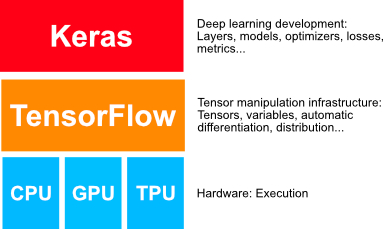

In [4]:
from IPython.display import Image
Image(filename= "Keras_block_diagram.jpg")

<h3><span style="color:black">3.3 Keras and TensorFlow: A brief history</span></h3>

By late 2017, a majority of TensorFlow users were using it through Keras or in combination with Keras. In 2018, the TensorFlow leadership picked Keras as TensorFlow’s official high-level API. As a result, the Keras API is front and center in TensorFlow 2.0, released in September 2019—an extensive redesign of TensorFlow and Keras that takes into account over four years of user feedback and technical progress.

<h3><span style="color:black">3.4. Setting up a deep-learning workspace</span></h3>

#### 3.4.1 Jupyter Notebooks: the preferred way to run deep-learning experiments

<h3><span style="color:black">3.5 First steps with TensorFlow</span></h3>

First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:<br>
• <i><span style="color:blue">Tensors</span></i> including special tensors that store the network’s state $\color{blue}{\textbf{variables}}$<br>
• $\color{blue}{\textbf{Tensor}}$ $\color{blue}{\textbf{operation}}$ such as addition, relu, matmul<br>
• $\color{blue}{\textbf{Backpropogation}}$a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object)